# Author

***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

*Github: https://github.com/hsthe29*

# Update Rule

$\theta = \theta - \eta \nabla_{\theta}J(\theta)$

# Import modules

In [31]:
from __future__ import print_function, unicode_literals, division
from sympy import symbols, diff, lambdify, simplify, Poly, expand
from sympy.solvers import solve
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)

In [32]:
x1, x2, t= symbols('x1 x2 t')

# Gradient Descent Method

$f(x) = 3x_1^3+x_2^2-3x_1-2x_2+12$

In [38]:
f = simplify('x1**2 + x2**2 + x1*x2 - 2*x2 +12')
grad = np.array([f.diff(x1), f.diff(x2)])
hessian = np.array([[df.diff(x1), df.diff(x2)] for df in grad])

f_val = lambdify([x1, x2], f)
grad_val = lambdify([x1, x2], grad)
print(grad.T)
print(hessian)

[2*x1 + x2 x1 + 2*x2 - 2]
[[2 1]
 [1 2]]


## Exact Line Search

In [4]:
x = np.array([[1, 1]])

iterator = 1
flag = True

while iterator < 100:
  temp_grad = grad_val(*x[-1])
  x_new = [x[-1][0] - t * temp_grad[0], x[-1][1] - t * temp_grad[1]]

  # find min step
  phi = expand(f_val(*x_new))
  coeffs = Poly(phi.diff(t), t).all_coeffs()
  positive_roots = list(filter(lambda x: x > 0, np.roots(coeffs)))
  vals = np.asarray(list(map(lambda x: lambdify(t, phi)(x), positive_roots)))
  tk = positive_roots[np.argmin(vals)]

  x = np.append(x, [lambdify(t, x_new)(tk)], axis = 0)

  if np.linalg.norm(grad_val(*x[-1])) < 1e-4:
    print('Found x =', x[-1])
    print('Trace of x:\n', x)
    flag = False
    break

  iterator += 1

if flag:
  print('No solution')

Found x = [-0.66661743  1.33332349]
Trace of x:
 [[ 1.          1.        ]
 [-0.15384615  0.61538462]
 [-0.37362637  1.27472527]
 [-0.57650042  1.20710059]
 [-0.6151431   1.32302862]
 [-0.65081326  1.31113857]
 [-0.65760758  1.33152152]
 [-0.66387925  1.32943096]
 [-0.66507386  1.33301477]
 [-0.66617657  1.3326472 ]
 [-0.66638661  1.33327732]
 [-0.6665805   1.33321269]
 [-0.66661743  1.33332349]]


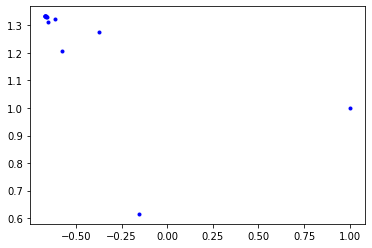

In [5]:
plt.plot(x[:, 0], x[:, 1],'b.')
plt.show()

# Gradient Backtracking

## Update Rule

$x^{k+1} = x^k-t_k\nabla f(x^k)$

Convergence condidion: $f(x^{k+1})-f(x^k) \leq m_1t_k⟨∇f(x^k),f(x^k)⟩=-m_1t_k\|∇f(x^k)\|^2$

In [40]:
m = 0.01
alpha = .5

def armijo(x_temp, x_new, tk):
  vt = f_val(*x_new) - f_val(*x_temp)
  vp = -m*tk * np.linalg.norm(grad_val(*x_temp)) ** 2
  return vt <= vp

def check_converged(x_new):
  return np.linalg.norm(grad_val(*x_new)) < 1e-3

def gradient_backtracking(sol_init):
  sol = [sol_init]
  t = []
  it = 1

  while it < 100:
    t_k = 1
    while True:
      sol_new = sol[-1] - t_k * np.asarray(grad_val(*sol[-1]))
      f_new = f_val(*sol_new)
      if armijo(sol[-1], sol_new, t_k):
        break
      t_k *= alpha
    t.append(t_k)
    sol.append(sol_new)
    if check_converged(sol_new):
      break
    it += 1
  return sol, it


In [49]:
(sol, it3) = gradient_backtracking(np.array([1, 1]))
solutions = np.asarray(sol)
print(solutions)

[[ 1.          1.        ]
 [-0.5         0.5       ]
 [-0.25        1.25      ]
 [-0.625       1.125     ]
 [-0.5625      1.3125    ]
 [-0.65625     1.28125   ]
 [-0.640625    1.328125  ]
 [-0.6640625   1.3203125 ]
 [-0.66015625  1.33203125]
 [-0.66601562  1.33007812]
 [-0.66503906  1.33300781]
 [-0.66650391  1.33251953]
 [-0.66625977  1.33325195]]


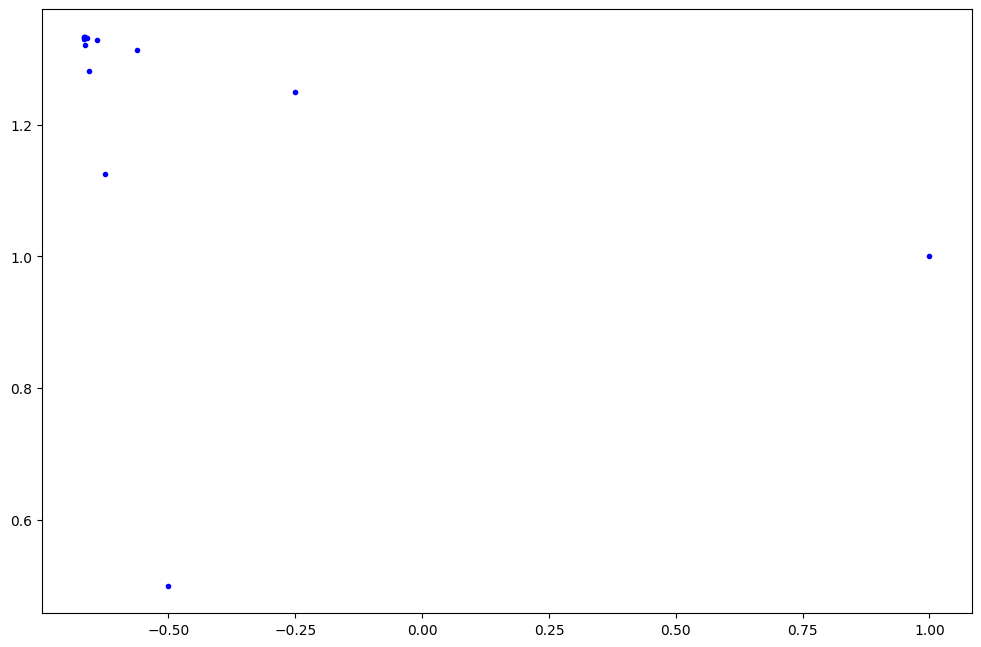

In [51]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(solutions[:, 0], solutions[:, 1], 'b.')

plt.show()


# Gradient Descent

## Univariate Function

$f(x) = x^2+5sin(x)$

In [6]:
def cost_u(x):
  return x**2 + 5 * np.sin(x)

def grad_u(x):
  return 2 * x + 5 * np.cos(x)

def myGD1(eta, x0):
  x = [x0]
  for it in range(100):
    x_new = x[-1] - eta*grad_u(x[-1])
    if abs(grad_u(x_new)) < 1e-3:
      break
    x.append(x_new)
  return (x, it)

In [7]:
(x1, it1) = myGD1(0.1, -5)
print(x1[-1])

-1.1106667365268623


## Multivariate Function

$f(x) = 2 + 7x$

[[2.02482931 6.96652133]]


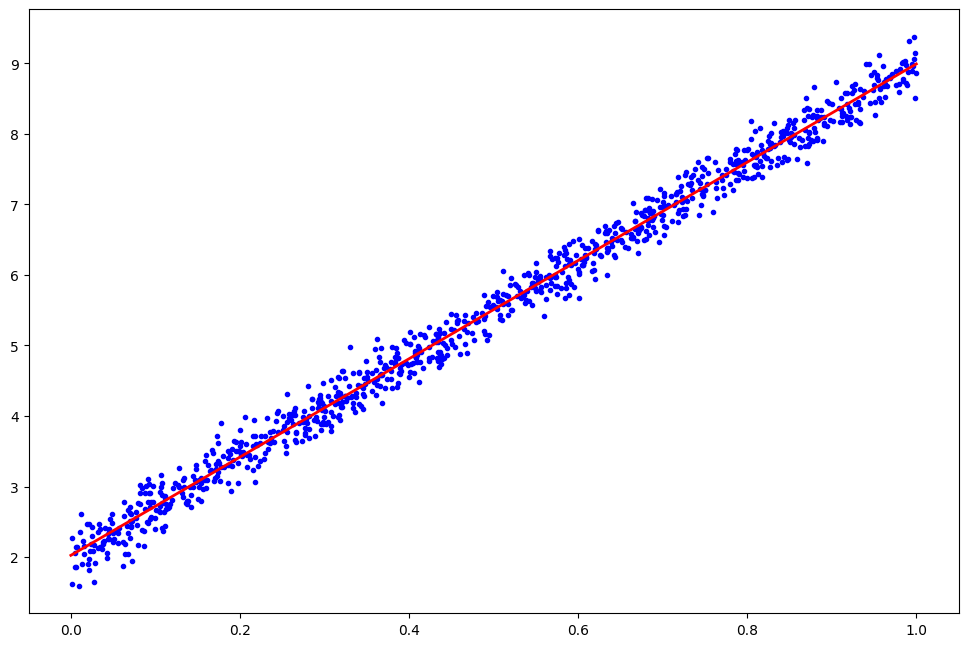

In [12]:
X = np.random.rand(1000, 1)
y = 2 + 7 * X + .2 * np.random.randn(1000, 1)

one = np.ones_like(X)

X_bar = np.concatenate((one, X), axis = 1)

Ap = X_bar.T @ X_bar
b = X_bar.T @ y

w = np.linalg.pinv(Ap) @ b

print(w.T)

x0 = np.linspace(0, 1, 2)
y0 = w[0, 0] + w[1, 0] * x0

plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(X.T, y.T, 'b.')
plt.plot(x0, y0, 'r', linewidth = 2)

plt.show()

In [9]:
def grad(w):
  return 1/X_bar.shape[0] * X_bar.T @ (X_bar @ w - y)

def cost(w):
  return 0.5/X_bar.shape[0] * np.linalg.norm(y - X_bar @ w) ** 2

In [10]:
def numerical_gradient(w, cost):
  eps = 1e-5
  res = np.zeros_like(w)
  n = len(w)
  for i in range(n):
    w_n = w.copy()
    w_t = w.copy()
    w_n[i] += eps
    w_t[i] -= eps
    res[i] = (cost(w_n) - cost(w_t)) / (2 * eps)
  return res

def check_gradient():
  w = np.random.rand(2, 1)
  gr1 = grad(w)
  gr2 = numerical_gradient(w, cost)
  return True if np.linalg.norm(gr1 - gr2) < 1e-6 else False

check_gradient()

True

Solution found by GD: w = [[2.0010086  7.00799216]], after 2 iterations.


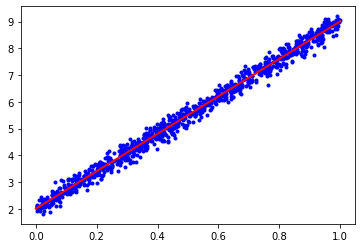

In [11]:
def gradient_descent(w_init, eta):
  w = [w_init]
  it = 1
  while it < 100:
    w_new = w[-1] - eta * grad(w[-1])
    if np.linalg.norm(grad(w_new)) < 1e-4:
      break
    w.append(w_new)
  return (w, it)

(w1, it1) = gradient_descent(np.array([[2], [2]]), 1)

print(f'Solution found by GD: w = {w1[-1].T}, after {it1+1} iterations.')

x0 = np.linspace(0, 1, 2)
y1 = w1[-1][0][0] + w1[-1][1][0] * x0

plt.plot(X.T, y.T, 'b.')
plt.plot(x0, y1, 'r', linewidth = 2)

plt.show()